In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wheat-seedsuci/seeds.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
import warnings 
warnings.filterwarnings('ignore')
df = pd.read_csv('/kaggle/input/wheat-seedsuci/seeds.csv')
df.head()
# type -> label

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
df.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [5]:
df.columns

Index(['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove', 'Type'],
      dtype='object')

In [6]:
df.shape

(199, 8)

In [7]:
# Vérifiez s'il y a des valeurs nulles
df.isnull().values.any()
# Supprimer les valeurs nulles
df = df.dropna()

In [8]:
# Vérifier les doublons
sum(df.duplicated())

0

In [9]:
df['Type'].unique()
# c'est la classification de trois types

array([1, 2, 3])

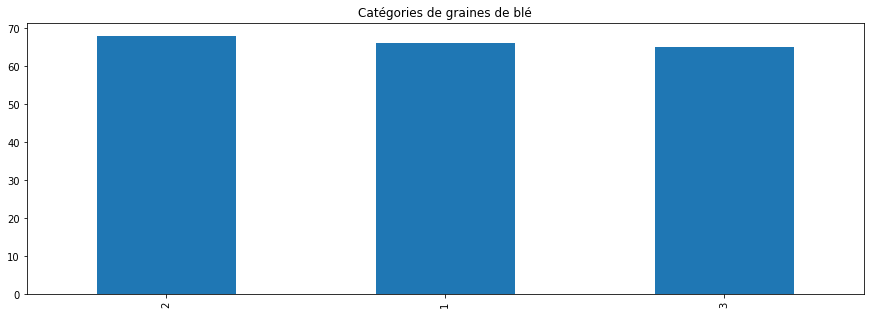

In [10]:
# Tracer le nombre de catégories de graines de blé
df['Type'].value_counts().plot(kind='bar', title='Catégories de graines de blé', figsize=(15,5))
plt.show()

In [11]:
X = df.iloc[:,0:7]
y = df.iloc[:,7]

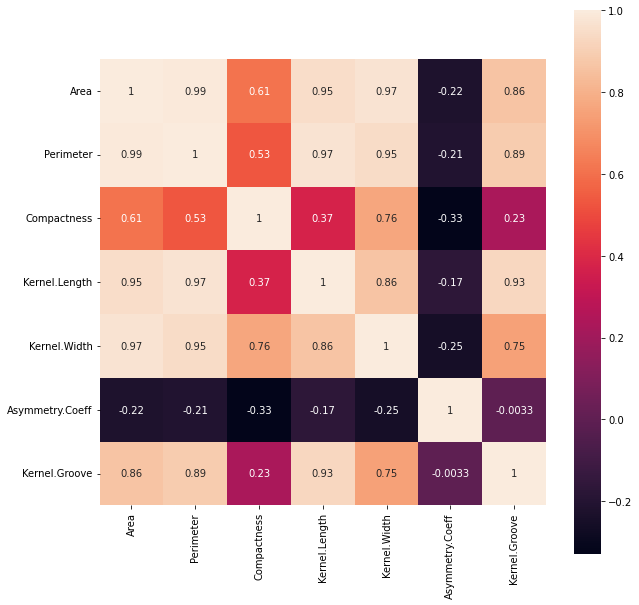

In [12]:
# Afficher la corrélation entre les fonctionnalités du jeu de données
corr = X.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, annot=True, square=True ,ax=ax)
plt.yticks(rotation=360)
plt.show()

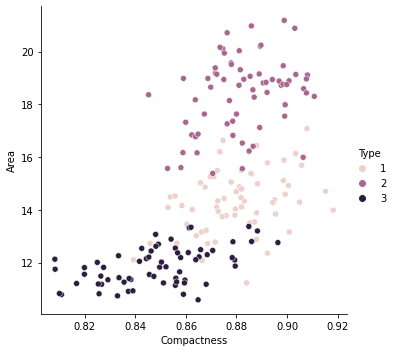

In [13]:
# Afficher la distribution des différents clusters dans notre ensemble de données
sns.relplot(x='Compactness', y='Area', hue='Type', data=df)

<AxesSubplot:>

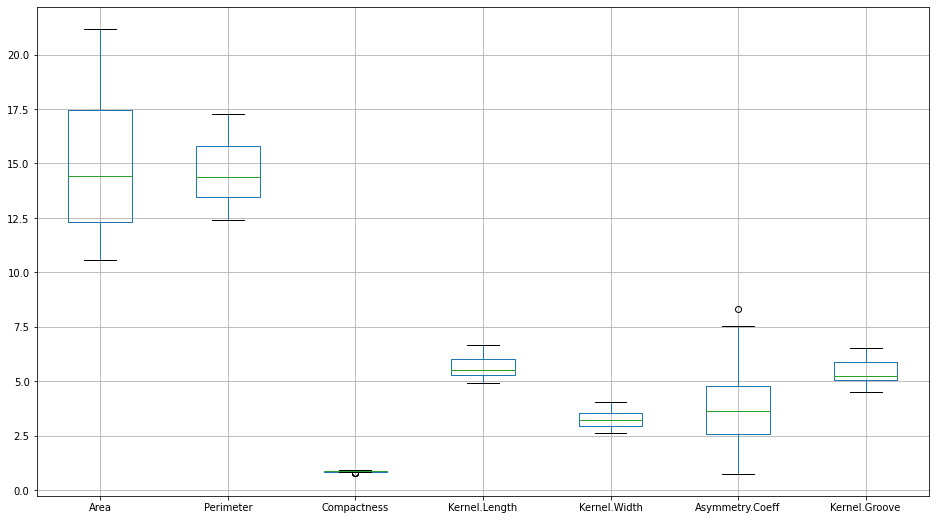

In [14]:
# Vérifier les valeurs aberrantes de l'ensemble de données
X.boxplot(figsize=(16,9))

In [15]:
# Fractionnement de l'ensemble de données en train et test à l'aide de train_test_split
x_train , x_test , y_train , y_test = train_test_split(X, y, random_state=50, test_size = 0.25)

# **Random forest classification**

In [16]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_hat = clf.predict(x_test)

In [17]:
confusion_matrix(y_hat, y_test)

array([[15,  0,  5],
       [ 0, 15,  0],
       [ 0,  0, 15]])

In [18]:
accuracy_score(y_hat, y_test)

0.9

In [19]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        15
           2       1.00      1.00      1.00        15
           3       1.00      0.75      0.86        20

    accuracy                           0.90        50
   macro avg       0.92      0.92      0.90        50
weighted avg       0.93      0.90      0.90        50



Text(0.5, 1.0, 'Importances des carcteres')

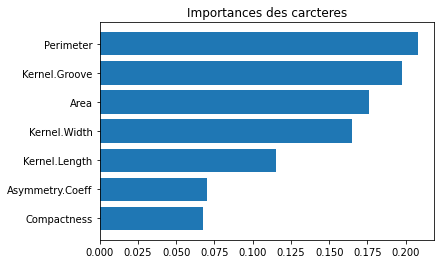

In [20]:
importances = clf.feature_importances_
indices = np.argsort(clf.feature_importances_)
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), x_train.columns[indices])
plt.title("Importances des carcteres")

# **Gradient Boosting classification**

In [21]:
clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)
y_hat = clf.predict(x_test)

In [22]:
confusion_matrix(y_hat, y_test)

array([[15,  0,  4],
       [ 0, 15,  0],
       [ 0,  0, 16]])

In [23]:
accuracy_score(y_hat, y_test)

0.92

In [24]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        15
           2       1.00      1.00      1.00        15
           3       1.00      0.80      0.89        20

    accuracy                           0.92        50
   macro avg       0.93      0.93      0.92        50
weighted avg       0.94      0.92      0.92        50



# **SVM**

In [25]:
clf = SVC()
clf.fit(x_train, y_train)
y_hat = clf.predict(x_test)

In [26]:
confusion_matrix(y_hat, y_test)

array([[15,  0,  1],
       [ 0, 15,  0],
       [ 0,  0, 19]])

In [27]:
accuracy_score(y_hat, y_test)

0.98

In [28]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00        15
           3       1.00      0.95      0.97        20

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# **decision tree classification**

In [29]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(x_train, y_train)
y_hat = clf.predict(x_test)

In [30]:
confusion_matrix(y_hat, y_test)

array([[15,  0,  4],
       [ 0, 15,  0],
       [ 0,  0, 16]])

In [31]:
accuracy_score(y_hat, y_test)

0.92

In [32]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        15
           2       1.00      1.00      1.00        15
           3       1.00      0.80      0.89        20

    accuracy                           0.92        50
   macro avg       0.93      0.93      0.92        50
weighted avg       0.94      0.92      0.92        50



In [33]:
'''
précision comparaison
RF -> 0.88
GB -> 0.92
SVM-> 0.98
DT -> 0.92
'''


'\nprécision comparaison\nRF -> 0.88\nGB -> 0.92\nSVM-> 0.98\nDT -> 0.92\n'